# Assignment 2 Submission for Group 13
## Members: Archit Patel, Samuel Worley, Yen Wen Ting

In [1]:
# importing module
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

#Reading the csv file and storing it in form of a datadframe
df = pd.read_csv('NYC_Restaurants.csv', dtype = str)

# Q1  Unique Name for each restaurent

#Concatinating DBA, BUILDING, STREET, ZIPCODE and BORO to create a new column RESTAURANT in the existing DataFrame

In [2]:
#RESTAURANT is the newly added column
df['RESTAURANT'] = (df['DBA'] +' '
                  + df['BUILDING'] + ' '
                  + df['STREET'] + ' '
                  + df['ZIPCODE'] + ' '
                  + df['BORO'])

#Below code prints the first 10 rows of the dataframe
df['RESTAURANT'].iloc[:10]

0           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
1           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
2           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
3           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
4           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
5        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
6        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
7        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
8        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
9    BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
Name: RESTAURANT, dtype: object

# Q2 No. of Unique Restaurants in the DataFrame

#Removing duplicates from the newly added RESTAURANTS column will give us unique restaurants in the DataFrame

In [3]:
#len will give us the count of unique values from the RESTAURANTS series.
len(df['RESTAURANT'].drop_duplicates())

10114

# Q3 No. of Chains in the DataFrame

#If a particular DBA is found at more than one location in the unique list of Restaurants we can consider it as a Chain

In [4]:
#Creating a dataframe containing only RESTAURANTS, DBA and BORO 
df1 = df[['RESTAURANT','DBA','BORO']]

#Removing the duplicate values 
df1 = df1.drop_duplicates()

#Creating a mask to calculate value 
mask = df1['DBA'].value_counts()>1

#len will give us the count of unique count of no. of chains in the dataframe 
len(df1['DBA'].value_counts()[mask])

368

# Q4 Top 20 Most popular Chains

#We can use the previous questions logic to calculate chains and then plot the first 20 chains, as .value_count() method
will return the count in descending order

<AxesSubplot:>

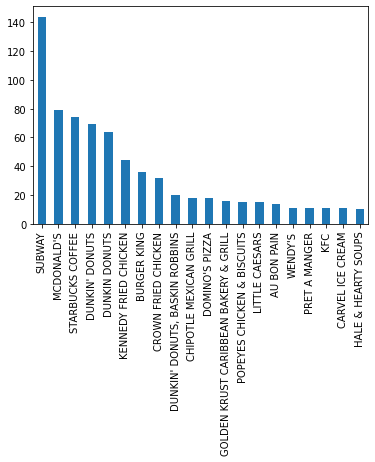

In [5]:
df1['DBA'].value_counts()[:20].plot(kind = 'bar')

# Q5 Chain Restaurants Fraction

#In Order to count the fraction of Chain restaurants we will have to divide chains by total unique restaurents

In [6]:
#Creating a mask which would give us only those restaurants that are present at more than one location
mask = df[['RESTAURANT','DBA']].drop_duplicates()['DBA'].value_counts()
mask = mask[mask>1]

#Calculating the total Chains
total_chains = len(df.loc[df['DBA'].isin(mask.index.values),]['RESTAURANT'].drop_duplicates())

#Total Unique Restaurants
total_unique_restaurants = len(df['RESTAURANT'].drop_duplicates())

#Fraction (Rounding off to 4 decimals)
round(total_chains / total_unique_restaurants, 4)

0.1647

# Q6 Non Chain Restarants in each Boro

#In Order to count the no. of Non Chain restaurants in each Boro we will have to 

<AxesSubplot:>

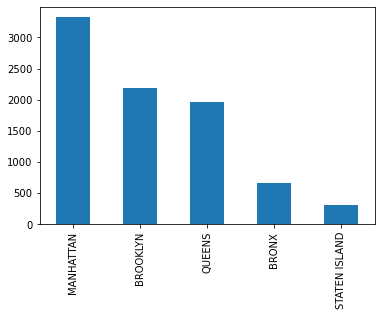

In [7]:
#Non Chain Restaurants
non_chain_list = df1['DBA'].value_counts()[(df1['DBA'].value_counts()==1)].index

mask = df1['DBA'].map(lambda x: x in non_chain_list)

#Using the mask to take only the Non Chain Restaurants and also removing 'Missing' boros
df1.loc[(mask == True) & (df1['BORO'] != 'Missing')]['BORO'].value_counts().plot(kind = 'bar')

# Q7 Fraction of Non Chain Restaurants in each Boro

#In Order to count the fraction of Non Chain restaurants in each Boro we will have to divide the Non Chain Restaurants in
each borough by the total restaurants in respective boro

<AxesSubplot:>

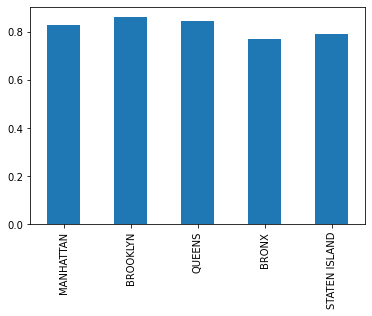

In [8]:
# Calculating total Restaurants per boro after removing missing boros
restaurants_per_boro = df1.loc[df['BORO'] != 'Missing']['BORO'].value_counts()

# Calculating Non Chain Restaurants per boro after removing missing boros
non_chain_list = df1['DBA'].value_counts()[(df1['DBA'].value_counts()==1)].index
mask = df1['DBA'].map(lambda x: x in non_chain_list)

non_chain_restaurant_per_boro = df1.loc[(mask) & (df1['BORO'] != 'Missing')]['BORO'].value_counts()

# Plotting the non chain restaurants vs Total Restaurants for each boro
(non_chain_restaurant_per_boro / restaurants_per_boro).plot(kind = 'bar')

#We see that Manhattan has most non chain restaurants from Q6, 
#but Brooklyn has highest fraction of non chain (independent) restaurants as seen from the below chart

# Q8 Popularity of Cuisines

Popularity of cusisine is defined by the no. of unique restaurants where it is served

<AxesSubplot:>

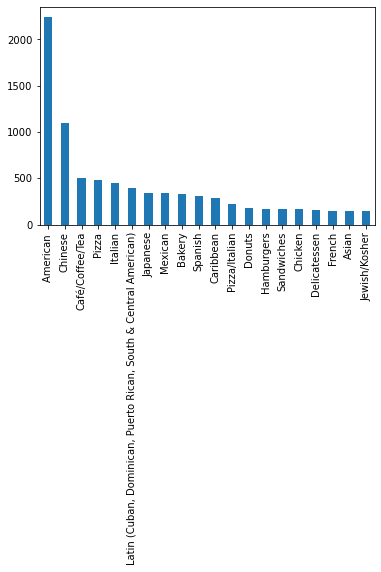

In [9]:
#Creating a dataframe containing only RESTAURANTS and Cusines
df2 = df[['RESTAURANT','CUISINE DESCRIPTION']]

#Removing the duplicate values 
df2 = df2.drop_duplicates()

#Plotting the restaurent count for each cusine in descending order
df2['CUISINE DESCRIPTION'].value_counts()[:20].plot(kind = 'bar')

# Q9 Restaurants with no violations

<AxesSubplot:>

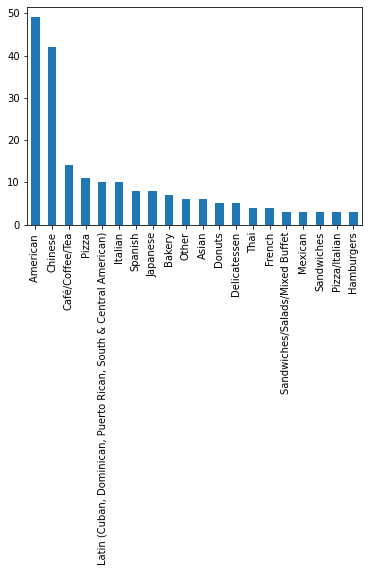

In [10]:
#Creating a dataframe containing only RESTAURANTS and Violation Description
df3 = df[['RESTAURANT','VIOLATION CODE','CUISINE DESCRIPTION']].drop_duplicates()

# List of Restaurants having atlease one null violation 
null_list = list(df3[df3['VIOLATION CODE'].isnull()]['RESTAURANT'].drop_duplicates())

# List of Restaurants having atlease one not null violation 
not_null_list = list(df3[df3['VIOLATION CODE'].notnull()]['RESTAURANT'].drop_duplicates())

# We are checking if the the restaurant with null violation is present in the list of restaurants with not null violation
# and if it is not present, then we can safely say that it doesnt have any violation and hence we can append it to the list
# no_violations which contains only those restaurants that were never cited for violation
no_violations = []
for i in null_list:
    if i not in (not_null_list):
        no_violations.append(i)

# Creating a DataFrame for the list of Restaurants having no violations
df4 = DataFrame(data = no_violations, columns = ['RESTAURANT'])

# Plotting the top 20 cusines for the restaurants with no violations
pd.merge(df4,df3,how = 'left', on = 'RESTAURANT')['CUISINE DESCRIPTION'].value_counts()[:20].plot(kind = 'bar')

# Q10 Cleanest Cuisines

In [11]:
#1.Select all cuisines for which there were atleast 20 restaurants presenting that cusine

mask = df[['RESTAURANT','CUISINE DESCRIPTION']].drop_duplicates()['CUISINE DESCRIPTION'].value_counts()
mask = mask[mask>=20]

df5 = df.loc[df['CUISINE DESCRIPTION'].isin(mask.index.values),]

#df4 has restaurants with no violations and df5 has cusines that were served at alleast 20 restaurants
no_violations_restaurants = pd.merge(df5,df4,how = 'inner', on = 'RESTAURANT')[['RESTAURANT','CUISINE DESCRIPTION']].drop_duplicates()
no_violations_restaurants = no_violations_restaurants['CUISINE DESCRIPTION'].value_counts()

In [12]:
#2.Ratio of restaurants that never got cited vs total restaurants for each cusine

total_restaurants = df3[['CUISINE DESCRIPTION','RESTAURANT']].drop_duplicates()['CUISINE DESCRIPTION'].value_counts()

(no_violations_restaurants  / total_restaurants).fillna(0).sort_values(ascending = False)

Soul Food                          0.090909
Vietnamese/Cambodian/Malaysia      0.062500
Other                              0.058252
Barbecue                           0.047619
Soups & Sandwiches                 0.047619
                                     ...   
Hotdogs/Pretzels                   0.000000
Ice Cream, Gelato, Yogurt, Ices    0.000000
African                            0.000000
Iranian                            0.000000
Indonesian                         0.000000
Name: CUISINE DESCRIPTION, Length: 79, dtype: float64

In [13]:
#3.Top-10 cuisines with the highest ratios; 

(no_violations_restaurants  / total_restaurants).fillna(0).sort_values(ascending = False).reset_index().iloc[:10]

,index,CUISINE DESCRIPTION
0,Soul Food,0.090909
1,Vietnamese/Cambodian/Malaysia,0.062500
2,Other,0.058252
3,Barbecue,0.047619
4,Soups & Sandwiches,0.047619
5,Continental,0.047619
6,Asian,0.041096
7,Chinese,0.038251
8,Greek,0.036364
9,Peruvian,0.035714


# Q11 Most Common Violations in each Boro

#cross tab function in python will compute cross tabulation of two variables

In [14]:
#This will give us the no. of times each violation occurs in each boro
df7 = df[df['BORO']!='Missing'][['VIOLATION DESCRIPTION','BORO']]
df7 = pd.crosstab(df7['VIOLATION DESCRIPTION'], df7['BORO'])
df7

BORO,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
VIOLATION DESCRIPTION,,,,,
"Choking first aid poster not posted. Alcohol and pregnancy warning sign not posted. Resuscitation equipment: exhaled air resuscitation masks (adult & pediatric), latex gloves, sign not posted. Inspection report sign not posted.",12,40,49,29,5
''''No Smoking and/or 'Smoking Permitted sign not conspicuously posted. Health warning not present on 'Smoking Permitted,1,5,6,4,1
''''Wash hands sign not posted at hand wash facility.,21,57,93,60,8
"A food containing artificial trans fat, with 0.5 grams or more of trans fat per serving, is being stored, distributed, held for service, used in preparation of a menu item, or served.",5,12,19,24,3
Accurate thermometer not provided in refrigerated or hot holding equipment.,21,76,98,92,16
...,...,...,...,...,...
Toilet facility not provided for employees or for patrons when required.,2,3,11,3,1
Toilet facility used by women does not have at least one covered garbage receptacle.,1,5,7,2,1
"Toxic chemical improperly labeled, stored or used such that food contamination may occur.",2,8,15,20,3


In [15]:
for i in df7:
    print("Boro", i,":\n",df7[i].idxmax(),"\n\n")

Boro BRONX :
 Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit. 


Boro BROOKLYN :
 Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit. 


Boro MANHATTAN :
 Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit. 


Boro QUEENS :
 Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipm

# Q12 Most Common Violations in each Boro

Normalizing the violation counts to get the most common violations in each boro

In [16]:
#1. Getting Overall Frequency
df8 = df[df['BORO']!='Missing'][['VIOLATION DESCRIPTION','BORO']]
violationFrequency = df8['VIOLATION DESCRIPTION'].value_counts()

In [17]:
#2. Normalize
for i in df7:
    print((df7[i]/violationFrequency))

Choking first aid poster not posted. Alcohol and pregnancy warning sign not posted. Resuscitation equipment: exhaled air resuscitation masks (adult & pediatric), latex gloves, sign not posted. Inspection report sign not posted.    0.088889
''''No Smoking and/or 'Smoking Permitted sign not conspicuously posted. Health warning not present on 'Smoking Permitted                                                                                                                0.058824
''''Wash hands sign not posted at hand wash facility.                                                                                                                                                                                     0.087866
A food containing artificial trans fat, with 0.5 grams or more of trans fat per serving, is being stored, distributed, held for service, used in preparation of a menu item, or served.                                                    0.079365
Accurate thermometer not

In [18]:
#3.Finding most common violations, by pointing to index with hightest violation using idxmax()
for i in df7:
    print("Boro", i,":\n",(df7[i]/violationFrequency).idxmax())

Boro BRONX :
 Unprotected food re-served.
Boro BROOKLYN :
 Precooked potentially hazardous food from commercial food processing establishment that is supposed to be heated, but is not heated to 140º F within 2 hours.
Boro MANHATTAN :
 Out-of package sale of tobacco products observed.
Boro QUEENS :
 Caloric content range (minimum to maximum) not posted on menus and or menu boards for each flavor, variety and size of each menu item that is offered for sale in different flavors, varieties and sizes.
Boro STATEN ISLAND :
 Eggs found dirty/cracked; liquid, frozen or powdered eggs not pasteurized.


# Q13 Area codes that have unique Zip Codes

In order to find area code that corresponding to unique zip code, we are first finding area code and then checking 
how many times it is repeated and taking only those zip that are not repeated

In [19]:
#First three digit of phone number equals to the area code
df11 = df[['ZIPCODE','PHONE']].drop_duplicates()
df11['AREA CODE'] = df11['PHONE'].astype(str).str[0:3]

#Creating a mask to count the number of times area code is repeated
mask = df11[['AREA CODE','ZIPCODE']]['AREA CODE'].value_counts()

#finding the no. of area code which are not repeated
len(mask[mask==1])

34

# Q14 Misspellings of Street Names

In [20]:
# Creating STREET TYPE , which stores the last name of the list
df["STREET TYPE"] = df["STREET"].str.split().str[-1]

# Creating STREET BASE, which contains everything but the last word
df["STREET BASE"] = df["STREET"].str.split().str[:-1].str.join(" ")

# Create STREET BASE & ZIP, it combines STREET BASE and ZIPCODE
df["STREET BASE & ZIP"] = (df["STREET BASE"] + " "
                          + df["ZIPCODE"])
#Creating Unique list of Street Type, Street Base and Street Base and Zip
STREET = df[["STREET TYPE", "STREET BASE", "STREET BASE & ZIP"]].drop_duplicates()

#Removing null values in STREET BASE if any
STREET = STREET[STREET["STREET BASE"]!=""]

#Merging the dataframes (Self join)
STREET = pd.merge(STREET, STREET, on ="STREET BASE & ZIP")

#Taking out observations that have different street type on merged data
STREET = STREET[STREET["STREET TYPE_x"].ne(STREET["STREET TYPE_y"])]

#Cross Tab - This gives us the number of timesAveandAvenuewere used with the sameSTREET BASE & ZIP
c_tab = pd.crosstab(index=[STREET["STREET TYPE_x"]], columns=STREET["STREET TYPE_y"])

#The most commonly street type that occurs with each of the following:AVE,ST,RD,PL,BOULEARD,andBULEVARD.
#idmax() will give us the 
c_tab.loc[:,['AVE', 'ST', 'RD', 'PL', 'BOULEARD', 'BULEVARD']].idxmax()

STREET TYPE_y
AVE         AVENUE
ST          STREET
RD            ROAD
PL           PLACE
BOULEARD      BLVD
BULEVARD      BLVD
dtype: object